In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Предварительная обработка данных

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
data = pd.merge(customers,
                orders,
                how= 'outer',
                on='customer_id'
               ).merge(items, how= 'outer', on='order_id')

In [10]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [11]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [12]:
data['order_purchase_timestamp'] = pd.to_datetime(data.order_purchase_timestamp)

**Удалим недоступные и отмененные заказы**

In [13]:
av_data = data.query("order_status!='unavailable' & order_status!= 'canceled'")

## RFM-анализ

**Цель RFM-анализа** - сегментировать клиентов по частоте и сумме покупок, а также промаркировать клиентов по давности покупок.

`Recency:` как давно клиенты что-то покупали/производили другое целевое действие 
`Frequency:` как часто клиенты совершают покупки/как много покупок совершали
`Monetary:` какую сумму клиенты оставили в нашем магазине за всю историю покупок

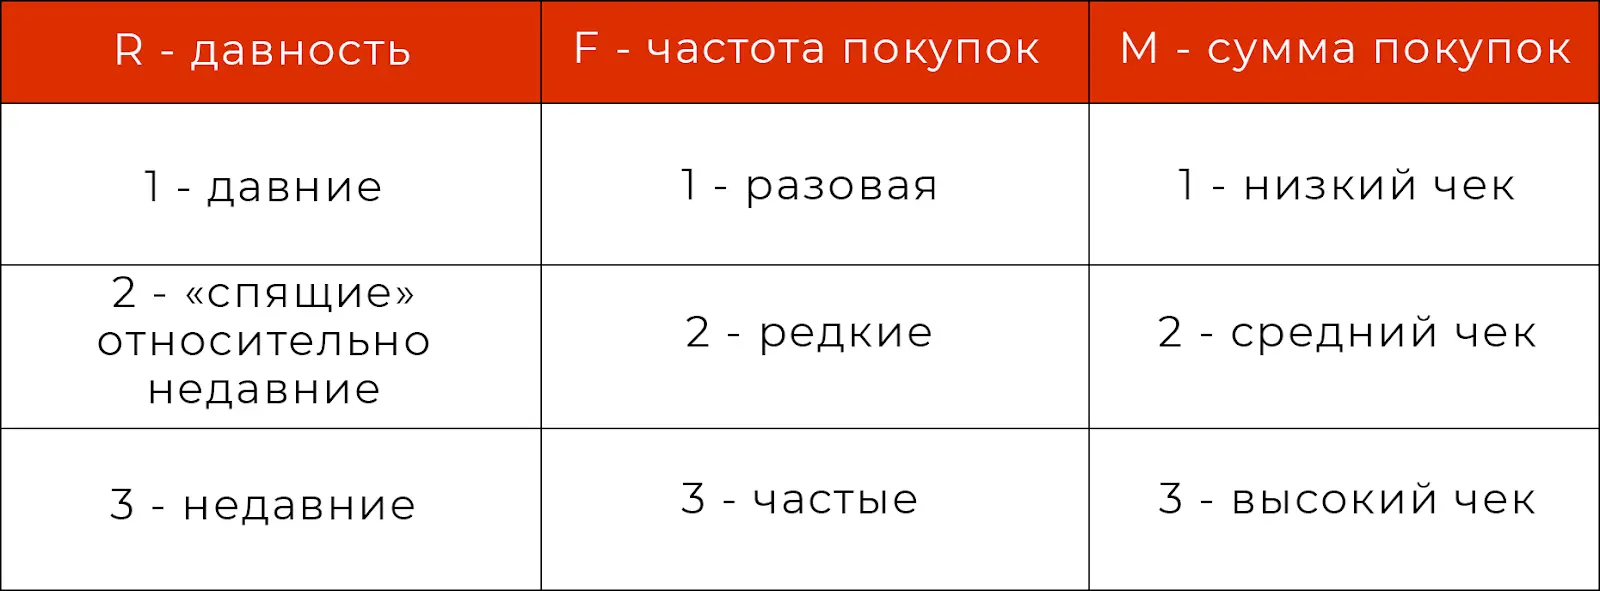

*По этим признакам можно разделить всех наших клиентов на группы*
1. кто из клиентов покупает часто и много;
2. кто часто, но мало;
3. кто вообще давно ничего не покупал.

## Готовим данные

In [14]:
rfm_df = av_data[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


In [15]:
rfm_df.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object

## `Recency`
как давно клиенты что-то покупали

*Найдем дату последней покупки каждого клиента*

In [16]:
r = rfm_df.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'] \
        .max().rename(columns={'order_purchase_timestamp':'last_order'})

In [17]:
r.head()

,customer_unique_id,last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


*Дата, с которой будем сравнивать, как давно клиент что-то покупал*

In [18]:
NOW = data['order_purchase_timestamp'].max()
NOW

Timestamp('2018-10-17 17:30:18')

In [19]:
r.last_order.max()

Timestamp('2018-09-03 09:06:57')

In [20]:
r.last_order.min()

Timestamp('2016-09-04 21:15:19')

У нас есть данные за три года, поэтому будем считать, что:

- если последняя покупка совершена более года назад, то это давно `R3` 

- если покупка совершена более двух месяцев назад, но меньше года назад, то это `R2`

- если покупка совершалась за последние два месяца, то это `R1`

In [21]:
from datetime import datetime, timedelta

def recency(x):
    if x >= NOW - timedelta(days=2*30):   # Из текущего времени вычтем 2 месяца
        return 'R1'
    elif x > NOW - timedelta(days=356):
        return 'R2'
    else:
        return 'R3'

r['recency'] = r['last_order'].apply(recency)

In [22]:
r.head()

,customer_unique_id,last_order,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,R2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,R2
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,R3
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,R3
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,R2


In [23]:
r.recency.value_counts()

R2    64161
R3    29377
R1     1452
Name: recency, dtype: int64

## Frequency
как часто клиенты совершают покупку

*Создадим таблицу с частотой заказов*

In [24]:
f = rfm_df.groupby('customer_unique_id', as_index=False)['order_id'].nunique().rename(columns={'order_id':'num_orders'})

In [25]:
f.head()

,customer_unique_id,num_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [26]:
f.describe()

,num_orders
count,94990.000000
mean,1.033867
std,0.210826
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


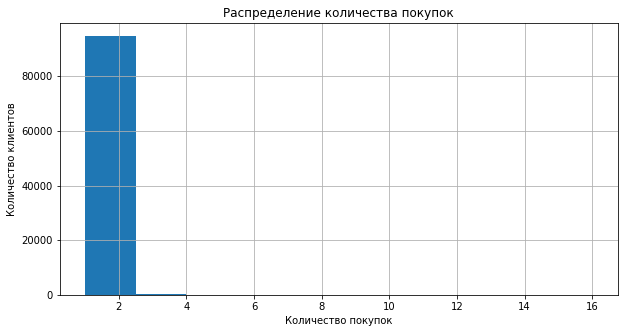

In [27]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение количества покупок') 
plt.xlabel('Количество покупок') 
plt.ylabel('Количество клиентов') 
plt.grid() 
plt.hist(f['num_orders'], bins=10)

plt.show()

In [28]:
f['num_orders'].value_counts()

1     92102
2      2652
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: num_orders, dtype: int64

- редкие клиенты — это клиенты с одной покупкой F3
- от 1 до 4 покупок — клиенты со средней активностью F2
- больше 4 покупок — частые клиенты F1

In [29]:
def frequency(x):
    if x <= 1:
        return 'F3'
    elif x <= 4:
        return 'F2'
    else:
        return 'F1'

f['frequency'] = f['num_orders'].apply(frequency)

In [30]:
f.frequency.value_counts()

F3    92102
F2     2869
F1       19
Name: frequency, dtype: int64

In [31]:
f.head()

,customer_unique_id,num_orders,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,F3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,F3
2,0000f46a3911fa3c0805444483337064,1,F3
3,0000f6ccb0745a6a4b88665a16c9f078,1,F3
4,0004aac84e0df4da2b147fca70cf8255,1,F3


## Monetary
какую сумму клиенты тратят

*Посчитаем сумму всех оплат для каждого клиента*

In [32]:
m = rfm_df.groupby('customer_unique_id', as_index=False)['price'].sum().rename(columns={'price':'tot_sum'})

In [33]:
m.head()

,customer_unique_id,tot_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


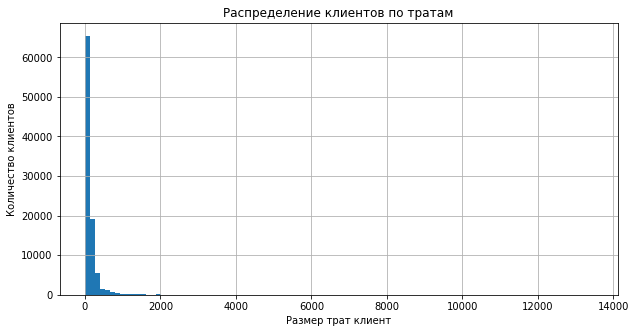

In [34]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение клиентов по тратам') 
plt.xlabel('Размер трат клиент') 
plt.ylabel('Количество клиентов') 
plt.grid() 
plt.hist(m['tot_sum'], bins=100)

plt.show()

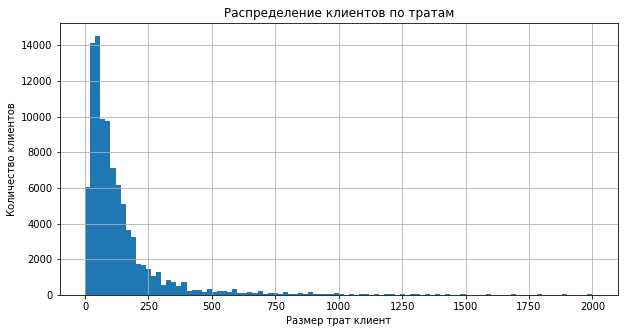

In [35]:
# Уменьшим разброс, оставив клиентов с тратами до 2000 
plt.figure(figsize=(10, 5))
plt.title('Распределение клиентов по тратам') 
plt.xlabel('Размер трат клиент') 
plt.ylabel('Количество клиентов') 
plt.grid() # сетка

plt.hist(m[m['tot_sum'] < 2000]['tot_sum'], bins=100)

plt.show()

In [36]:
m['tot_sum'].describe()

count    94990.000000
mean       142.061277
std        216.070479
min          0.000000
25%         47.882500
50%         89.810000
75%        155.000000
max      13440.000000
Name: tot_sum, dtype: float64

- к `М1` отнесем клиентов, потративших от 500 и больше
- от  250 до 500 - `M2`
- меньше 250 - `М3`

In [37]:
def monetary(x):
    if x <= 250:
        return 'M3'
    elif x <= 500:
        return 'M2'
    else:
        return 'M1'

m['monetary'] = m['tot_sum'].apply(monetary) 

In [38]:
m.head()

,customer_unique_id,tot_sum,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,M3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,M3
2,0000f46a3911fa3c0805444483337064,69.00,M3
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,M3
4,0004aac84e0df4da2b147fca70cf8255,180.00,M3


## RFM
Объединим полученные результаты

In [39]:
rfm_table = pd.merge(r, f, on = 'customer_unique_id').merge(m, on = 'customer_unique_id')

In [40]:
rfm_table.head()

,customer_unique_id,last_order,recency,num_orders,frequency,tot_sum,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,R2,1,F3,129.90,M3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,R2,1,F3,18.90,M3
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,R3,1,F3,69.00,M3
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,R3,1,F3,25.99,M3
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,R2,1,F3,180.00,M3


In [41]:
rfm_table['rfm_group'] = rfm_table['recency'] + rfm_table['frequency'] + rfm_table['monetary']
rfm_table.head()

,customer_unique_id,last_order,recency,num_orders,frequency,tot_sum,monetary,rfm_group
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,R2,1,F3,129.90,M3,R2F3M3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,R2,1,F3,18.90,M3,R2F3M3
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,R3,1,F3,69.00,M3,R3F3M3
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,R3,1,F3,25.99,M3,R3F3M3
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,R2,1,F3,180.00,M3,R2F3M3


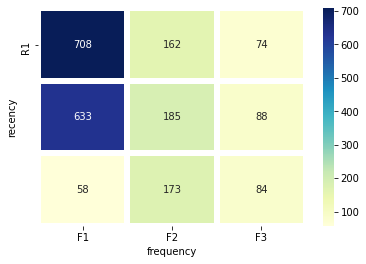

In [42]:
viz = rfm_table.pivot_table(
                                    index='recency',
                                    columns='frequency',
                                    values='tot_sum',
                                    aggfunc=np.median).applymap(int)
sns.heatmap(viz,cmap='YlGnBu', annot=True, fmt='.0f', linewidth=4.15, annot_kws={"size":10}, yticklabels=4);

### Таблица со средними тратами, средней частотой покупок, датой последней совершенной покупки и количеством клиентов, входящих в данный кластер

In [43]:
rfm_mean_metrics = rfm_table.groupby('rfm_group') \
        .agg({'tot_sum':'mean',
              'num_orders':'mean', 
              'last_order':'max', 
              'customer_unique_id':'nunique'}) \
        .rename(columns={'tot_sum':'mean_spending',
                         'num_orders': 'mean_order_frequency',
                         'last_order': 'last_order_date',
                         'customer_unique_id': 'size_group'})

In [44]:
rfm_mean_metrics

,mean_spending,mean_order_frequency,last_order_date,size_group
rfm_group,,,,
R1F1M1,708.690000,11.000000,2018-08-23 00:07:26,2
R1F2M1,659.890000,2.000000,2018-08-20 12:38:56,1
R1F2M2,336.964000,2.333333,2018-09-03 09:06:57,15
R1F2M3,128.541250,2.093750,2018-08-28 21:56:12,32
R1F3M1,921.018421,1.000000,2018-08-28 20:49:17,38
R1F3M2,338.006744,1.000000,2018-08-29 14:18:23,86
R1F3M3,79.968365,1.000000,2018-08-29 15:00:37,1278
R2F1M1,849.461000,6.200000,2018-08-15 18:01:23,10
R2F1M2,411.404000,5.200000,2018-06-14 09:28:49,5


## ВЫВОД

R2F3M3 - самая большая группа клиентов, которые сделали по одной покупке стоимостью в среднем 89, но совершили ее менее года назад

Также можно сделать, что больше всего клиентов, сделавших только по одной покупке, постоянных и лояльных практически нет